In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data={'+':np.array([[1,2],[2,3],[3,1.5],[1,2.5]]),
      '*':np.array([[4,5],[5,6],[7,5.5],[5,6.6]])}

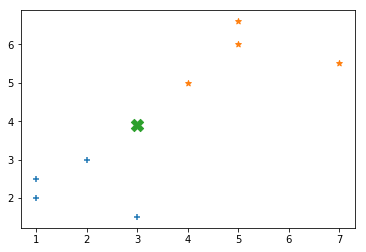

In [3]:
for i in data:
    plt.scatter(data[i][:,0],data[i][:,1],marker=i)
plt.scatter(3,3.9,marker='X',s=150)

In [31]:
from scipy.spatial.distance import euclidean
import pandas as pd

In [43]:
def knn(data,prd):
    dist=[]
    for i in data:
        for pt in data[i]:
            dist.append((euclidean(pt,prd),i))
    v=sorted(dist)[:3]
    votes=[i[1] for i in v]
    d=dict(pd.Series(votes).value_counts())
    return max(d,key=d.get)
knn(data,np.array([4,3.9]))

'*'

In [44]:
dts=pd.read_csv('ucicancer.csv')

In [45]:
dts.columns

Index(['Unnamed: 0', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'class'],
      dtype='object')

In [49]:
dts=dts.replace('?',15)
dts['g']=dts['g'].astype(dtype='i')

In [48]:
dts.dtypes

Unnamed: 0    int64
a             int64
b             int64
c             int64
d             int64
e             int64
f             int64
g             int32
h             int64
i             int64
j             int64
class         int64
dtype: object

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x=dts.drop(['Unnamed: 0','a','class'],axis=1)
y=dts['class']

In [52]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)

In [53]:
x_tr,y_tr

(698, 9)

In [67]:
d=dict.fromkeys(y_tr)
for i in d:
    d[i]=[]
for i in range(x_tr.shape[0]):
    d[y_tr.iloc[i]].append(x_tr.iloc[i].values)

In [69]:
c=0
for i in range(len(x_ts)):
    if knn(d,x_ts.iloc[i])==y_ts.iloc[i]:
        c+=1
c/len(x_ts)

0.9571428571428572

In [57]:
d

{4: [array([ 8,  3,  5,  4,  5, 10,  1,  6,  2], dtype=int64),
  array([7, 8, 3, 7, 4, 5, 7, 8, 2], dtype=int64),
  array([3, 3, 6, 4, 5, 8, 4, 4, 1], dtype=int64),
  array([10, 10, 10,  7,  9, 10,  7, 10, 10], dtype=int64),
  array([ 9, 10, 10,  1, 10,  8,  3,  3,  1], dtype=int64),
  array([ 8, 10, 10, 10,  6, 10, 10, 10, 10], dtype=int64),
  array([8, 9, 9, 5, 3, 5, 7, 7, 1], dtype=int64),
  array([6, 3, 4, 1, 5, 2, 3, 9, 1], dtype=int64),
  array([ 8, 10, 10, 10,  6, 10, 10, 10,  1], dtype=int64),
  array([5, 3, 3, 3, 2, 3, 4, 4, 1], dtype=int64),
  array([10, 10, 10, 10, 10,  1,  8,  8,  8], dtype=int64),
  array([5, 3, 3, 1, 3, 3, 3, 3, 3], dtype=int64),
  array([ 8, 10, 10,  8,  7, 10,  9,  7,  1], dtype=int64),
  array([ 5,  8,  9,  4,  3, 10,  7,  1,  1], dtype=int64),
  array([ 9,  7,  7,  5,  5, 10,  7,  8,  3], dtype=int64),
  array([ 5,  4,  6,  6,  4, 10,  4,  3,  1], dtype=int64),
  array([10, 10, 10,  2, 10, 10,  5,  3,  3], dtype=int64),
  array([ 8,  4,  5,  1,  2, 15